# Food Demand Forecasting
Predict the number of orders for upcoming 10 weeks

## Used Python Libraries

In [1]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Know Dataset Nature
1. head() : It is used to get the first 5 rows of the dataframe.
2. tail() : It is used to get the last 5 rows of the dataframe.
3. describe() : It is used to view some basic statistical details like percentile, mean, std etc.
4. info() : It is used to print a concise summary of a DataFrame. including the index dtype and column dtypes, non-null values and memory usage

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
meal = pd.read_csv('data/meal_info.csv')
centerinfo = pd.read_csv('data/fulfilment_center_info.csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
centerinfo.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


## Light Data Exploration
### 1) For numeric data
  * Made histograms to understand distributions
  * Corrplot

### 2) For Categorical Data
   * Made bar charts to understand balance of classes

In [8]:
train_cat = train[['center_id','meal_id','emailer_for_promotion','homepage_featured']]
train_num = train[['week','checkout_price']]


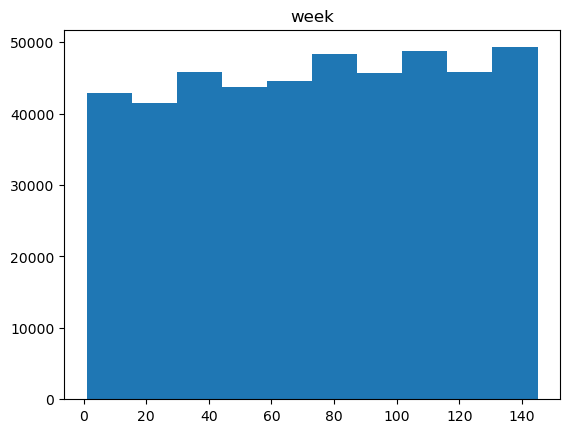

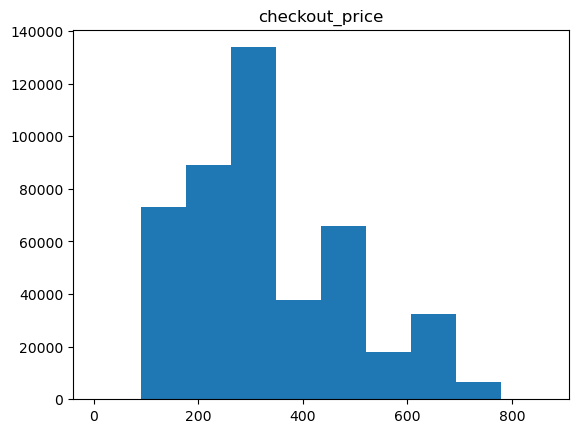

In [9]:
for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.show()

<Axes: >

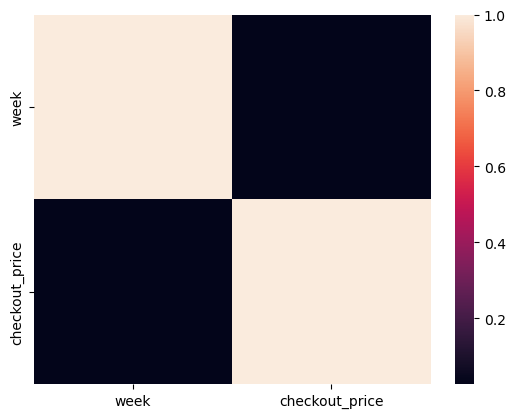

In [10]:
sns.heatmap(train_num.corr())

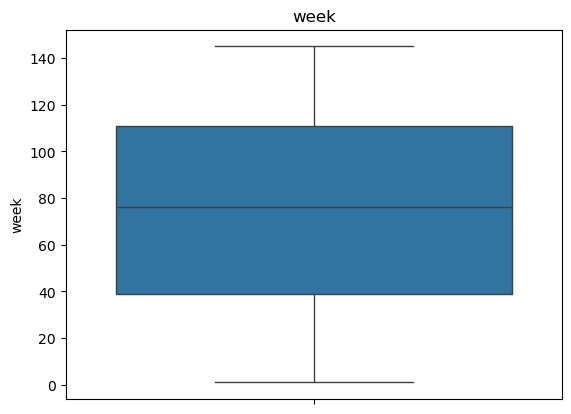

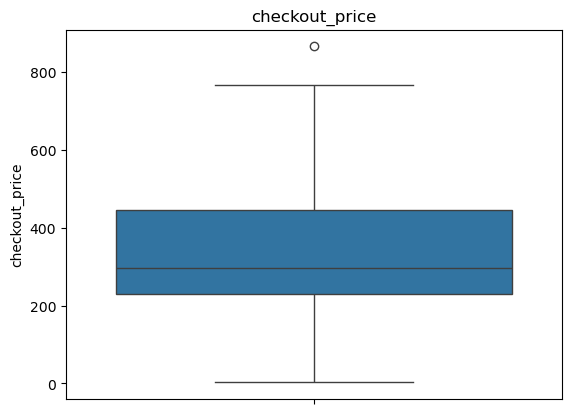

In [12]:
for i in train_num.columns:
    sns.boxplot(train_num[i])
    plt.title(i)
    plt.show()

In [13]:
def outlinefree(dataCol):     
      
    sorted(dataCol)                          # sort column
    Q1,Q3 = np.percentile(dataCol,[25,75])   # getting 25% and 75% percentile
    IQR = Q3-Q1                              # getting IQR 
    LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
    UpperRange = Q3+(1.5 * IQR)              # getting Upperrange 
    
    colname = dataCol.tolist()               # convert column into list  
    newlist =[]                              # empty list for store new values
    for i in range(len(colname)):
        
        if colname[i] > UpperRange:          # list number > Upperrange 
            colname[i] = UpperRange          # then number = Upperrange
            newlist.append(colname[i])       # append value to empty list
        elif colname[i] < LowerRange:        # list number < Lowrange 
            colname[i] = LowerRange          # then number = Lowrange
            newlist.append(colname[i])       # append value to empty list 
        else:
            colname[i]                       # list number
            newlist.append(colname[i])       # append value to empty list
            
        

    return newlist

In [14]:
for i in range(len(train_num.columns)):
    new_list =  outlinefree(train.loc[:,train_num.columns[i]]) # retrun new list
    train.loc[:,train_num.columns[i]] = new_list 

In [15]:
def center_id(datacol):
    center_id_val_index_n = []
    for i in datacol:
        if i >= 10 and i <= 30:
            center_id_val_index_n.append("10-30")
        elif i >= 31 and i <=50:
            center_id_val_index_n.append("31-50")
        elif i >= 51 and i <=70:
            center_id_val_index_n.append("51-70")  
        elif i >= 71 and i <=90:
            center_id_val_index_n.append("71-90")
        elif i >= 91 and i <=110:
            center_id_val_index_n.append("91-110") 
        elif i >= 111 and i <=130:
            center_id_val_index_n.append("111-130")
        elif i >= 131 and i <=150:
            center_id_val_index_n.append("131-150")          
        else:
            center_id_val_index_n.append("151-190")
    
    return  center_id_val_index_n 
center_id_val_index_n = center_id(train.center_id) 
train.center_id = center_id_val_index_n

In [16]:
def meal_id(datacol):        
    meal_id_val_index_n = []
    for i in datacol:
        if i >= 1000 and i <= 1300:
            meal_id_val_index_n.append("1000-1300")
        elif i >= 1301 and i <=1600:
            meal_id_val_index_n.append("1301-1600")
        elif i >= 1601 and i <=1900:
            meal_id_val_index_n.append("1601-1900")  
        elif i >= 1901 and i <=2200:
            meal_id_val_index_n.append("1901-2200")
        elif i >= 2201 and i <=2500:
            meal_id_val_index_n.append("2201-2500") 
        elif i >= 2501 and i <=2800:
            meal_id_val_index_n.append("2501-2800")          
        else:
            meal_id_val_index_n.append("2801-3000") 
    return  meal_id_val_index_n

meal_id_val_index_n = meal_id(train.meal_id)
train.meal_id = meal_id_val_index_n

## Feature Selection
1. seaborn.pairplot(): It is help to figure-out relation between features and label.

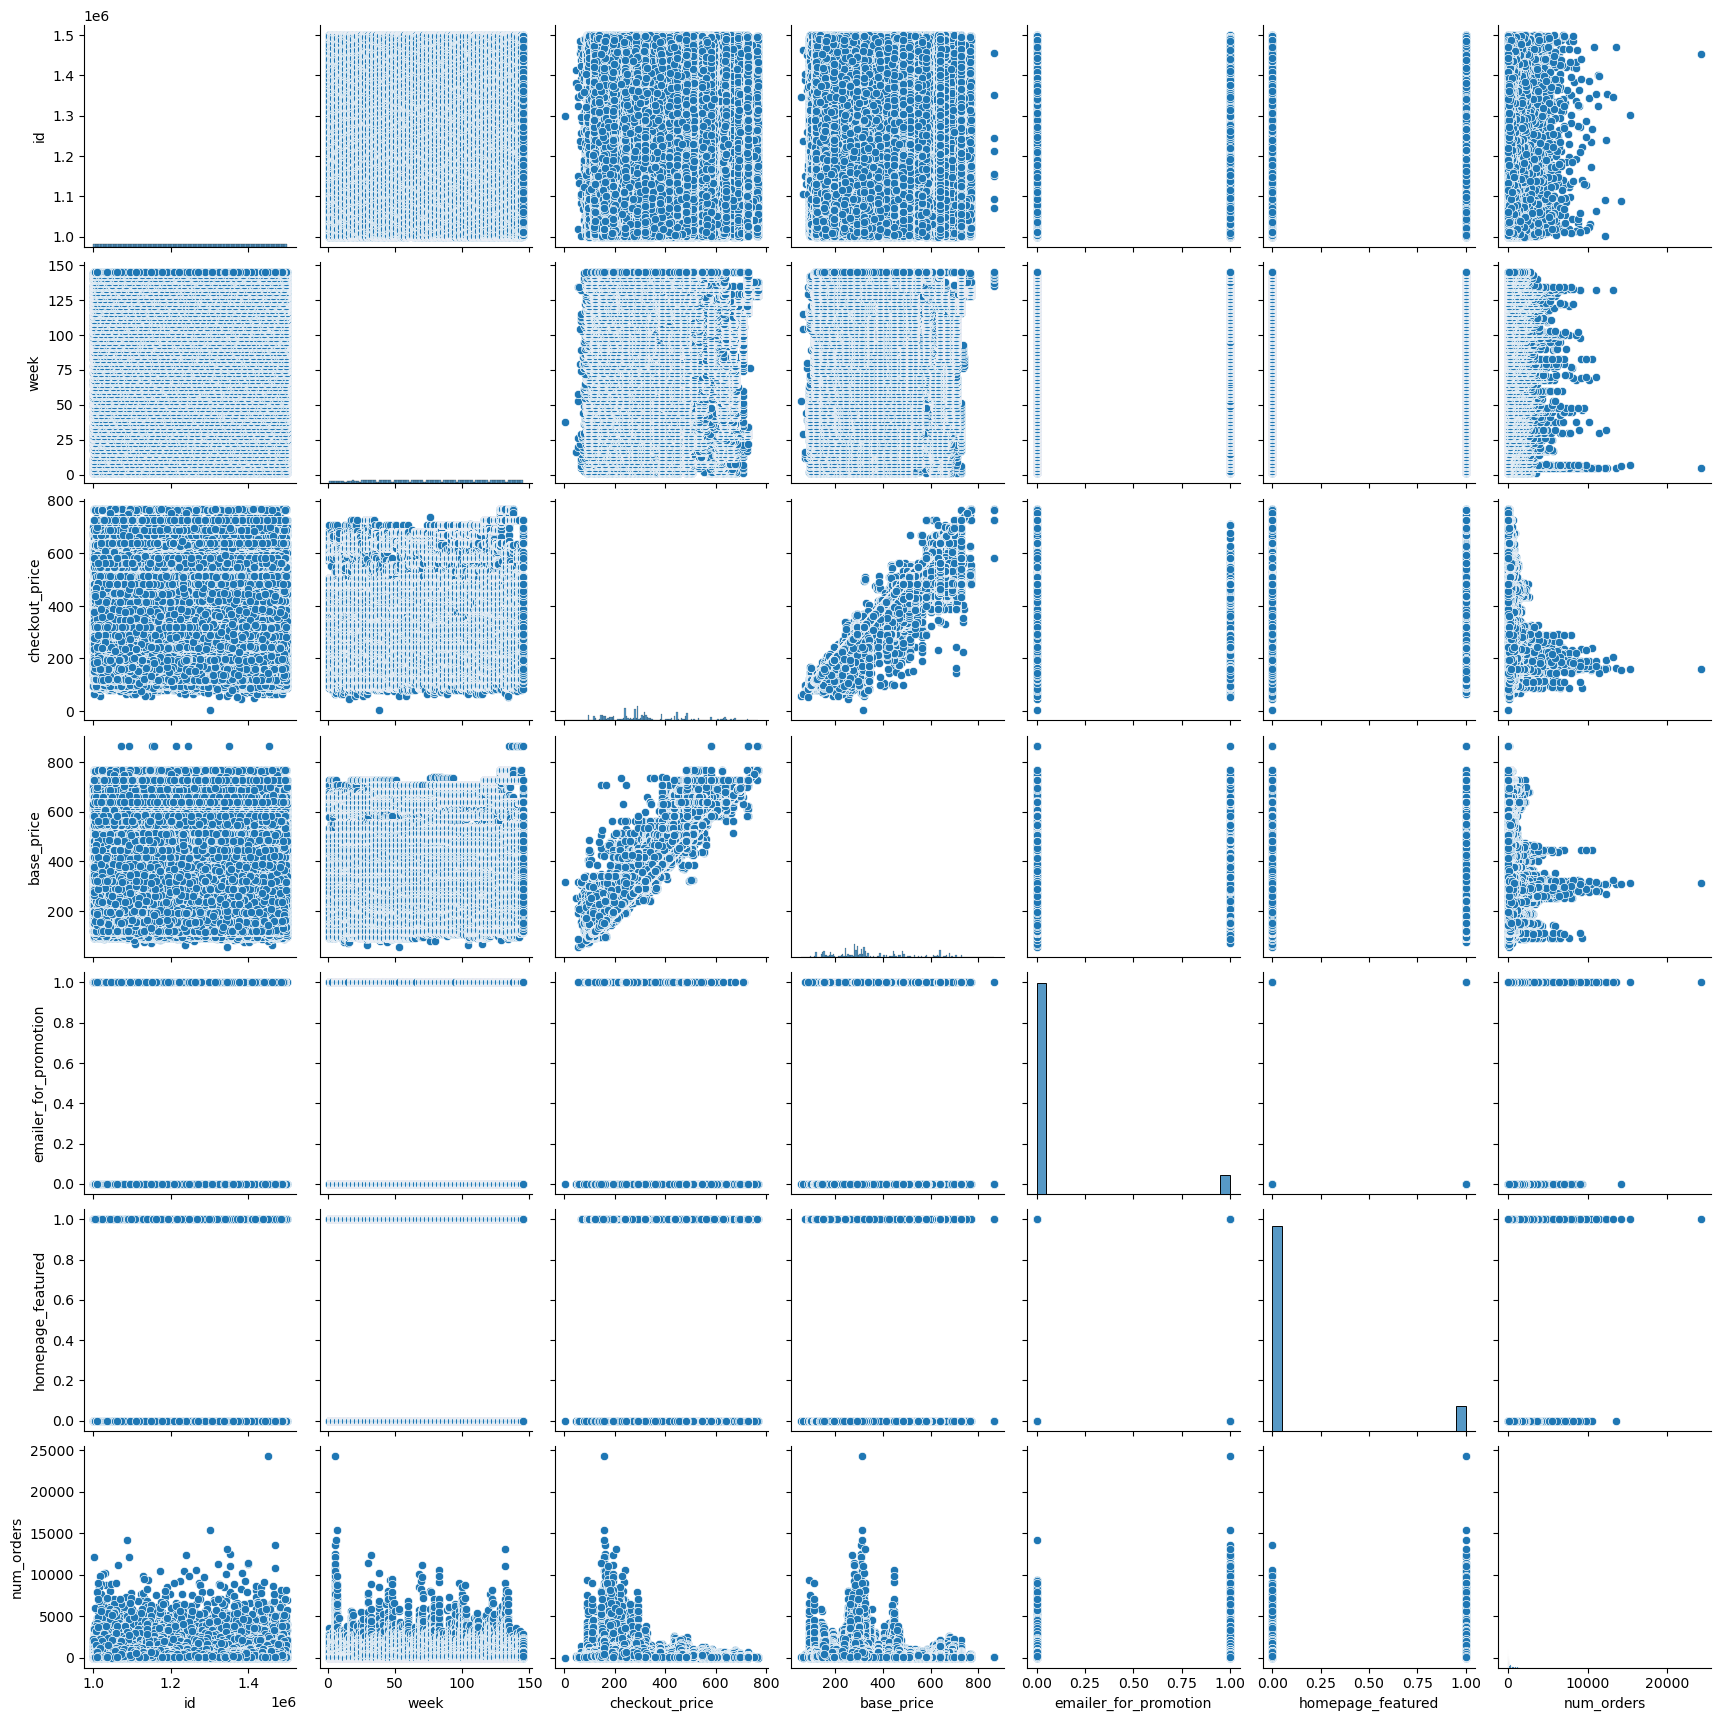

In [17]:
sns.pairplot(train)

In [18]:
f_train = train.loc[:,['num_orders','week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_train = pd.get_dummies(f_train)

In [19]:
features = final_train.iloc[:,1:].values
label = final_train.iloc[:,:1].values

## Model Buliding
here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. LinearRegression (RMSE: 334.45162241353864)
2. DecisionTreeRegressor (RMSE:  332.8261160204239)
3. **RandomForestRegressor (RMSE: 331.0142032987282)**

In [20]:
#------------------------------------ LinearRegression ---------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1705)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [21]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.22430653751828467
MSE score  : 111857.88773504822
RMSE:  334.45162241353864


In [22]:
#------------------------------------ DecisionTreeRegressor---------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=1956)
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(X_train,y_train)
y_pred = DTRmodel.predict(X_test)

In [23]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2615191471545507
MSE score  : 110773.22350524069
RMSE:  332.8261160204239


In [24]:
#------------------------------------ RandomForestRegressor ---------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.20,random_state=33)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)
RFRmodel.fit(X_train,y_train)
y_pred = RFRmodel.predict(X_test)

In [25]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2596071920579188
MSE score  : 109570.40278549175
RMSE:  331.0142032987282


## Conclusion
I will choose a **RandomForestRegressor algorithm** for this dataset.

**RandomForestRegressor score**:

1. **RMSE score : 331.0142032987282** 


## Applying Algorithm
before applying the algorithm to the test dataset. we should make it a complete numeric dataset. the following setups are below mentioned.
1. columns center_id and meal_id has many categorical values.
2. to manage categorical columns we using function their create new few sub-categories.
3. using get_dummies() function.
4. here our data is ready to apply an algorithm on it.

In [26]:
center_id_val_index_n = center_id(test.center_id) 
test.center_id = center_id_val_index_n

meal_id_val_index_n = meal_id(test.meal_id)
test.meal_id = meal_id_val_index_n

In [27]:
f_test = test.loc[:,['week','center_id','meal_id','checkout_price','base_price','emailer_for_promotion',
                 'homepage_featured']]
final_test = pd.get_dummies(f_test)

In [28]:
test_predict = RFRmodel.predict(final_test)

In [29]:
test['num_orders'] = test_predict

In [30]:
sample =  test.loc[:,['id','num_orders']]

In [31]:
sample.to_csv('sample_submission.csv',index=False)